# HW 6. Principal components analysis

In [180]:
import numpy as np
import scipy as sci
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [115]:
np.set_printoptions(linewidth=1000)

## Rencher 12.8

Carry out a principal component analysis on all six variables of the glucose
data of `Table 3.8`. Use both $S$ and $R$. Which do you think is more appropriate here? Show the percent of variance explained. Based on the average
eigenvalue or a scree plot, decide how many components to retain. Can you
interpret the components of either $S$ or $R$?


In [116]:
cols = ["y1", "y2", "y3", "x1", "x2", "x3"]
df = pd.read_table("data/T3_8_GLUCOSE.DAT", header=None, sep="\s+", names=cols)

In [117]:
df.head()

,y1,y2,y3,x1,x2,x3
0,60,69,62,97,69,98
1,56,53,84,103,78,107
2,80,69,76,66,99,130
3,55,80,90,80,85,114
4,62,75,68,116,130,91


In [118]:
S = df.cov()
R = df.corr()

In [119]:
np.diag(S)

array([ 95.5444898 ,  73.1922449 ,  76.17346939, 808.63020408, 505.85959184, 508.71387755])

### PCA with covariance matrix 

In [120]:
S_l, S_v = sci.linalg.eig(S)
S_l = np.real(S_l)
idx = np.argsort(S_l)[::-1]
S_l = S_l[idx]
S_v = S_v[idx]

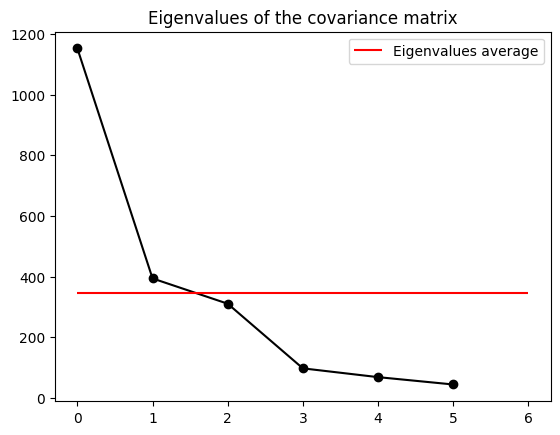

In [121]:
plt.plot(np.arange(len(S_l)), S_l, marker='o', color='black')
plt.hlines(S_l.mean(), 0, len(S_l)-1, color='red', label='Eigenvalues average')
plt.legend()
plt.title("Eigenvalues of the covariance matrix")
plt.show()

In [122]:
(S_l / S_l.sum()).cumsum()

array([0.55701926, 0.74759018, 0.8978652 , 0.945139  , 0.97842342, 1.        ])

In [123]:
n = 2
S_v[:n]

array([[-0.08007824,  0.09212769, -0.06885666,  0.805104  , -0.34598517,  0.46093441],
       [-0.03368073, -0.01754852,  0.2016778 ,  0.51825669,  0.77610213, -0.29488846]])

In [124]:
df_projected = df @ S_v[:n].T 

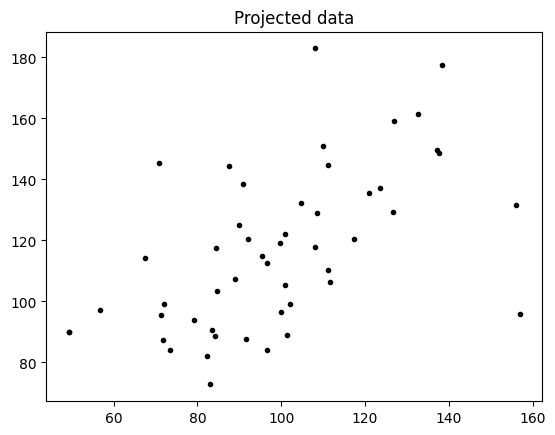

In [125]:
plt.scatter(df_projected.iloc[:, 0], df_projected.iloc[:, 1], color='black', s=9)
plt.title("Projected data")
plt.show()

### PCA with correlation matrix

In [126]:
R_l, R_v = sci.linalg.eig(R)
R_l = np.real(R_l)
idx = np.argsort(R_l)[::-1]
R_l = R_l[idx]
R_v = R_v[idx]

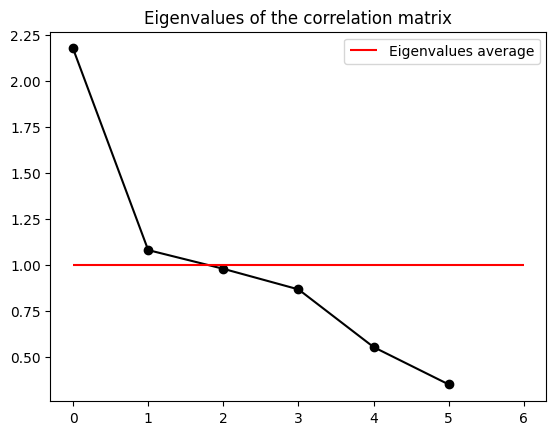

In [127]:
plt.plot(np.arange(len(R_l)), R_l, marker='o', color='black')
plt.hlines(R_l.mean(), 0, len(R_l)-1, color='red', label='Eigenvalues average')
plt.legend()
plt.title("Eigenvalues of the correlation matrix")
plt.show()

In [128]:
(R_l / R_l.sum()).cumsum()

array([0.36280015, 0.54275163, 0.70571859, 0.85000536, 0.94195312, 1.        ])

In [129]:
n = 4
S_v[:n]

array([[-0.08007824,  0.09212769, -0.06885666,  0.805104  , -0.34598517,  0.46093441],
       [-0.03368073, -0.01754852,  0.2016778 ,  0.51825669,  0.77610213, -0.29488846],
       [-0.07603295,  0.12171053, -0.01077758,  0.24733551, -0.47836476, -0.8302299 ],
       [-0.75780268, -0.44578138, -0.46921522, -0.01232592,  0.07355034, -0.03591034]])

### Conclusions

Since variances of the data are approximately of the same order, usual approach with covariance matrix seems more reasonable.  

With "mean eigenvalue" approach for the optimal components number in both cases $2$ components should be the number of choice. With percent of variatoin method, for S-PCA three components is enough to maintain 89% of variance, for R-PCA four components is needed for 85% of variance

## Rencher 12.10

Carry out a principal component analysis separately for males and females in
the psychological data of `Table 5.1`. Compare the results for the two groups.
Use S.


In [137]:
cols = ["sex", "y1", "y2", "y3", "y4"]
df = pd.read_table("data/T5_1_PSYCH.DAT", header=None, sep="\s+", names=cols)

In [138]:
df

,sex,y1,y2,y3,y4
0,1,15,17,24,14
1,1,17,15,32,26
2,1,15,14,29,23
3,1,13,12,10,16
4,1,20,17,26,28
...,...,...,...,...,...
59,2,13,15,18,20
60,2,11,16,18,28
61,2,7,7,19,18
62,2,12,15,7,28


In [144]:
df_males, df_females = df[df.sex==1].drop(columns='sex'), df[df.sex==2].drop(columns='sex')

In [170]:
S_l, S_v = sci.linalg.eig(df_males.cov())
S_l = np.real(S_l)
idx = np.argsort(S_l)[::-1]
S_l = S_l[idx]
S_v = S_v[idx]

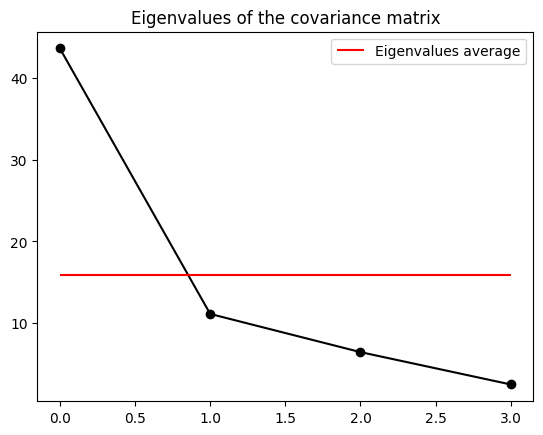

In [171]:
plt.plot(np.arange(len(S_l)), S_l, marker='o', color='black')
plt.hlines(S_l.mean(), 0, len(S_l)-1, color='red', label='Eigenvalues average')
plt.legend()
plt.title("Eigenvalues of the covariance matrix")
plt.show()

In [172]:
var1 = (S_l / S_l.sum()).cumsum()

In [173]:
S_l, S_v = sci.linalg.eig(df_females.cov())
S_l = np.real(S_l)
idx = np.argsort(S_l)[::-1]
S_l = S_l[idx]
S_v = S_v[idx]

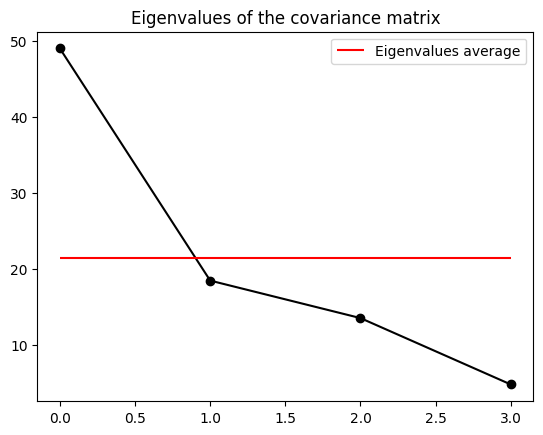

In [174]:
plt.plot(np.arange(len(S_l)), S_l, marker='o', color='black')
plt.hlines(S_l.mean(), 0, len(S_l)-1, color='red', label='Eigenvalues average')
plt.legend()
plt.title("Eigenvalues of the covariance matrix")
plt.show()

In [175]:
var2 = (S_l / S_l.sum()).cumsum()

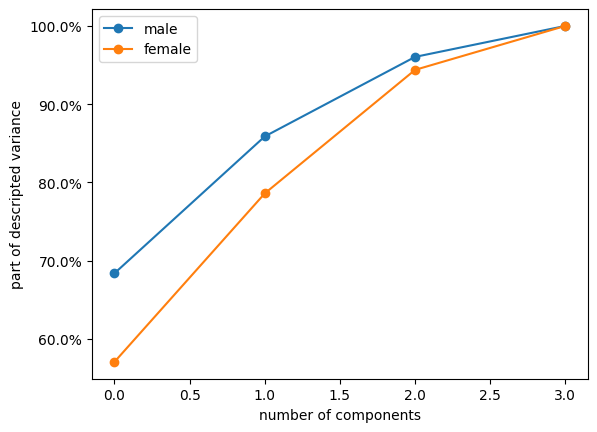

In [182]:
plt.plot(np.arange(len(var1)), var1 * 100, marker="o", label="male")
plt.plot(np.arange(len(var2)), var2 * 100, marker="o", label="female")
plt.xlabel("number of components")
plt.ylabel("part of descripted variance")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend()
plt.show()